# Not all polls are retweeted equally

Somebody on Twitter noted that polls showing a tigher election result were retweeted more often.

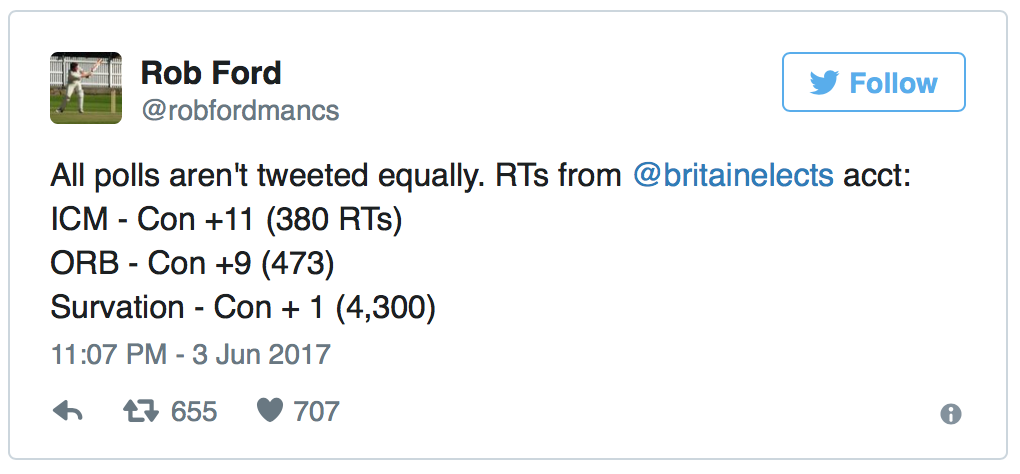

Lets use the Twitter API to confirm this observation.

### Getting out stuff together

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from twython import Twython
from datetime import datetime
import pytz
import json
import re

### Configuring our Twitter client

In [2]:
CREDS=json.loads(open('./creds.json').read())
twitter = Twython(CREDS['consumer_key'], CREDS['consumer_secret'], CREDS['access_token'], CREDS['access_token_secret'])

### Downloading the tweets
I'm going to use the [@BritainElects](http://twitter.com/britainelects) feed because it's convenient. Let's grab as much as we can with one API call (200) and filter it down so that we only have "Westminster voting intention".

In [3]:
tweets = twitter.get_user_timeline(screen_name='britainelects', count=200)
KEEP_KEYS = [ 'created_at', 'retweet_count', 'text' ]
westminster = [ { k: t[k] for k in KEEP_KEYS } for t in tweets if t['text'].startswith('Westminster voting intention') ]

We'll define this function to parse out the voting intention for each party.

In [4]:
PATTERN = "([A-Z]+):? ([0-9]+)%"
def calc_diff(input):
    intention = dict(re.findall(PATTERN, input))
    return int(intention['CON']) - int(intention['LAB'])

Now we can plot a graph of retweets against this difference. I'll use a logarithmic scale for the y-axis.

<IPython.core.display.Javascript object>


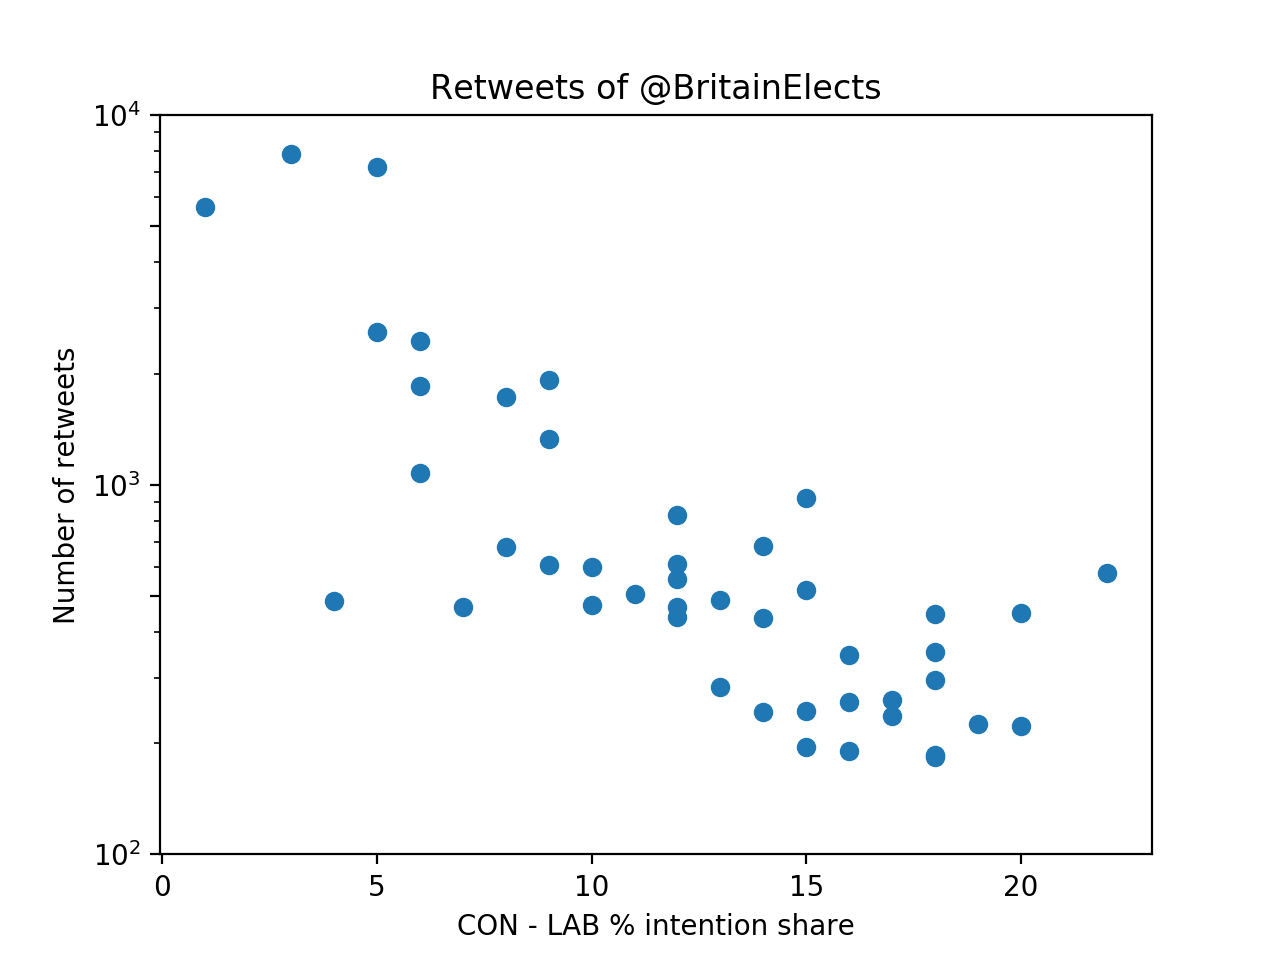

In [5]:
plt.figure()
xs = [ calc_diff(t['text']) for t in westminster ]
ys = [ t['retweet_count'] for t in westminster ]
plt.scatter(xs, ys)
plt.title('Retweets of @BritainElects')
plt.yscale('log')
plt.yticks([100, 500, 1000, 5000, 10000])
plt.xlabel('CON - LAB % intention share')
plt.ylabel('Number of retweets')

Hmmm... then again, polls have been tightening as we get closer to the election. Let's just check there is no correlation there.

In [6]:
def parsedate(input):
    return datetime.strptime(input,'%a %b %d %H:%M:%S +0000 %Y').replace(tzinfo=pytz.UTC)

<IPython.core.display.Javascript object>


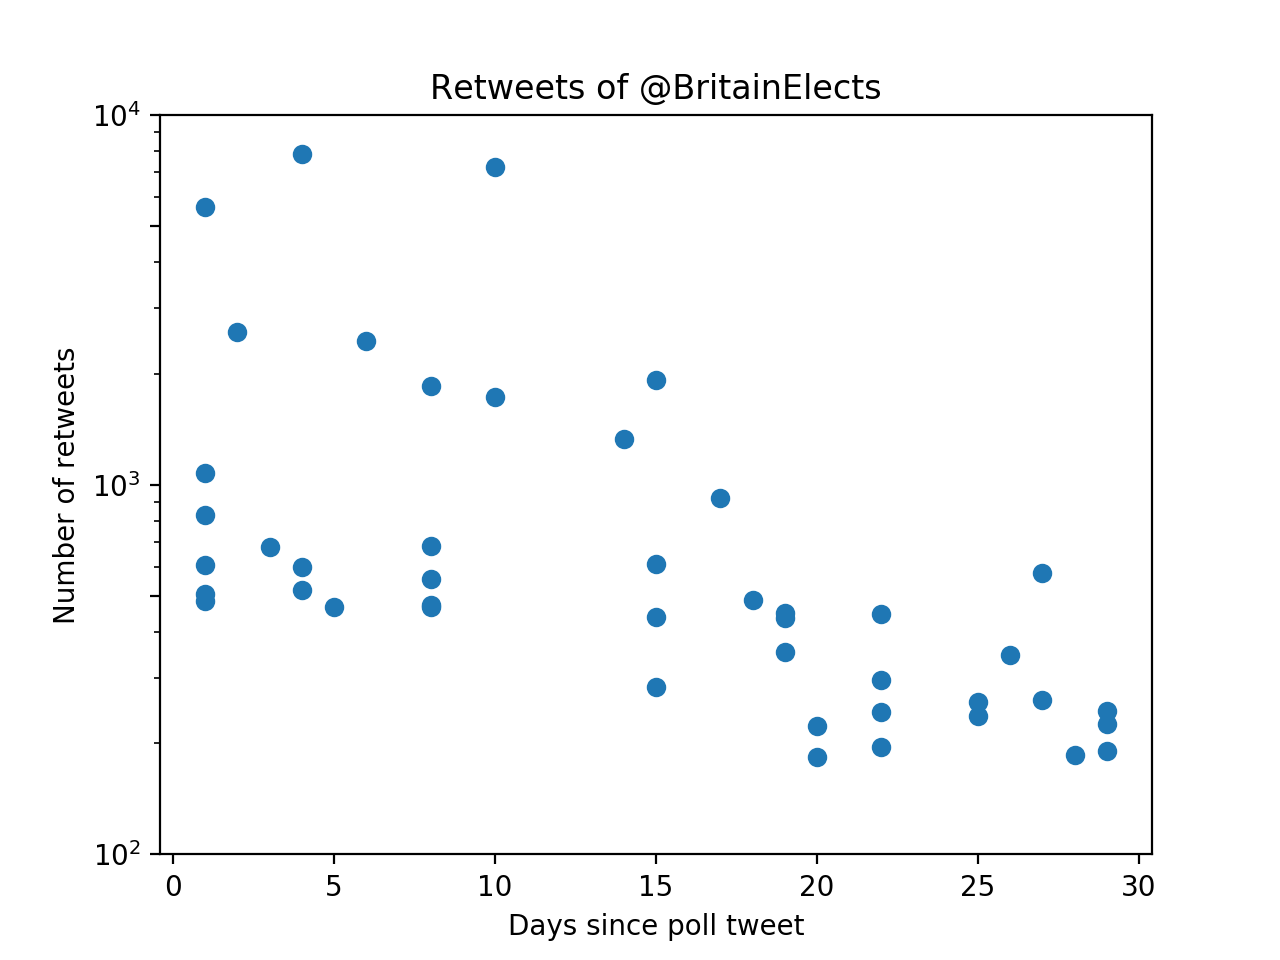

In [7]:
plt.figure()
today = datetime.today().replace(tzinfo=pytz.UTC)
xs = [ (today - parsedate(t['created_at'])).days for t in westminster ]
ys = [ t['retweet_count'] for t in westminster ]
plt.scatter(xs, ys)
plt.title('Retweets of @BritainElects')
plt.yscale('log')
plt.yticks([100, 500, 1000, 5000, 10000])
plt.xlabel('Days since poll tweet')
plt.ylabel('Number of retweets')

That looks like a much weaker relationship to me.